In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from tkinter import *
import time


In [2]:
# paramètres
#taille monde:

n = 20
m = 20
nb_tour = 20
#taux d'infection :

rzero = 2
chance_infect = 0.5

#durée de vie virus et vaccin :

duree_infection = 3
duree_vaccin = 20

#taux vaccinal :

taux_immun = 0.95

nb_vacc = 2
freq_vaccin = 1
freq_depla = 4

In [3]:
#génère un monde de taille n,m

def generate_spatial_world(n,m):
    return np.random.choice([1,0],size=(n,m),p = [0.9,0.1])
worldtest = generate_spatial_world(n,m)
worldtest

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
#génère la premiere infection aléatoire d'un monde de taille n,m

def infection_world(world):
    worldbis = np.copy(world)
    while True:
        n = random.randint(0,len(worldbis[:,0])-1)
        m = random.randint(0,len(worldbis[0,:])-1)
        if worldbis[n,m] == 1:
            worldbis[n,m] = 2
            break
    return worldbis

worldtest=infection_world(worldtest)

worldtest

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,

In [5]:
#infecte la cellule x,y, si elle n'est pas vaccinée

def infection_cellule(world,x,y):
    worldbis = np.copy(world)
    if world[x,y] != 3:
        worldbis[x,y] = 2
    return worldbis



In [6]:
def infection_vaccin(world,parallele,x,y,taux_immun):
    worldbis = np.copy(world)
    parabis = np.copy(parallele)
    if world[x,y] == 3:
        chance = random.random()
        if chance >= taux_immun:
            worldbis[x,y] = 2
            parabis[x,y] = 0
    return worldbis,parabis



In [7]:
# idée pour la gestion des temps d'infection /vaccin , création d'un deuxieme vecteur 2d comportant les durées de vie des états actuels

#création d'un monde parallele:

def creation_parallele(world):
    parallele = np.zeros((len(world[:,0]),len(world[0,:])))
    return parallele

#test
#print(creation_parallele(worldtest))
#print(worldtest)
#paralleletest = creation_parallele(worldtest2)

In [8]:

#création d'un monde parallele:

def desinfection(world,duree_infection,parallele):
    worldbis = np.copy(world)
    parabis = np.copy(parallele)
    for i in range(len(world[:,0])):
        for j in range(len(world[0,:])):
            if (worldbis[i][j] == 2 and parabis[i][j] != duree_infection):
                parabis[i][j] += 1
            elif(worldbis[i][j] == 2 and parabis[i][j] == duree_infection):
                worldbis[i][j] = 1
                parabis[i][j] = 0
    return worldbis , parabis

#test
#ix = 0
#for ix in range (4):
    #worldtest2,paralleletest = desinfection(worldtest2,3,paralleletest )
    #print(worldtest2,paralleletest)
#print(desinfection(worldtest2,duréeinfection,creation_parallele(worldtest2)))

In [9]:
#génère un tableau en 1d du voisinage de la case nm

def voisins(world,n,m):
    voisins=[]
    for i in range(0,len(world[:,0])):
        for j in range(0,len(world[0,:])):
            if max(abs(i-n),abs(j-m))<=1 and not(i==n and j == m) :
                voisins.append(world[i,j])
    return voisins

In [10]:
#vérifie si il y autre chose que des malades et cases vides dans le voisinage

def verif_voisins(world,n,m):
    for i in voisins(world,n,m):
        if i != 0 and i!= 2:
            return True
    return False

In [11]:
#fais évoluer le monde en effectuant un tour( pour le moment seul les nouvels infections sont gérées)
#avec la proba
def tour(world,rzero,duree_infection,parallele,chance_infect):
    worldbis = np.copy(world)
    parabis = np.copy(parallele)
    for i in range (0, len(world[:,0])):
        for j in range ( 0, len(world[0,:])):
            if world[i,j] == 2 and verif_voisins(worldbis,i,j):
                nb = 0 
                while nb < rzero and verif_voisins(worldbis,i,j):
                    x = i + (random.randint(-1,1))
                    y = j + (random.randint(-1,1))
                    rand = random.random()
                    if (x >= 0 and x <= len(world[:,0])-1) and (y>= 0 and y<= len(world[0,:])-1):
                        if worldbis[x,y] != 0 and worldbis[x,y]!= 2:
                            if rand  >= chance_infect:
                                worldbis = infection_cellule(worldbis,x,y)
                            nb += 1
    return desinfection(worldbis,duree_infection,parabis)


In [12]:
#effectue le deplacement d'un membre du monde choisi de manière aléatoire
#tp
def deplacement(world,parallele):
    worldbis = np.copy(world)
    parabis = np.copy(parallele)
    x1 = random.randint(0,len(world[:,0])-1)
    y1 = random.randint(0,len(world[0,:])-1)
    x2 = random.randint(0,len(world[:,0])-1)
    y2 = random.randint(0,len(world[0,:])-1)  
    while world[x1,y1] == 0 or (x1 == x2 and y1 == y2):
        x1 = random.randint(0,len(world[:,0])-1)
        y1 = random.randint(0,len(world[0,:])-1) 
    worldbis[x2,y2] = world[x1,y1]
    worldbis[x1,y1] = world[x2,y2]
    parabis[x2,y2] = parallele[x1,y1]
    parabis[x1,y1] = parallele[x2,y2]
    return worldbis,parabis

In [13]:
#effectue x tour d'évolution du monde en ajoutant un déplacement aléatoire tous les freq_depla tours 

def tour_boucle(world,rzero,nbtour,freq_depla,duree_infection,parallele,chance_infect):
    worldbis = np.copy(world)
    parabis = np.copy(parallele)
    i = 0
    while i < nbtour:
        if i%freq_depla == 0:
            worldbis,parabis = deplacement(worldbis,parabis)
        worldbis,parabis = tour(worldbis,rzero,duree_infection,parabis,chance_infect)
        #print(worldbis,"\n",parabis,"\n","\n")
        i+= 1
    return worldbis

In [14]:
def vaccin(world):
    worldbis = np.copy(world)
    breack = 0
    for i in range (0, len(world[:,0])):
        if breack != 0:
            break
        for j in range ( 0, len(world[0,:])):
            if world[i][j] == 1 :
                breack +=1
                break
    if breack == 0:
        return worldbis
    else:
        x1 = random.randint(0,len(world[:,0])-1)
        y1 = random.randint(0,len(world[0,:])-1) 
        while world[x1,y1] != 1:
            x1 = random.randint(0,len(world[:,0])-1)
            y1 = random.randint(0,len(world[0,:])-1) 
        worldbis[x1,y1] = 3
        return worldbis

vaccin(worldtest)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
def devaccin(world,parallele,duree_vaccin):
    worldbis = np.copy(world)
    parabis = np.copy(parallele)
    for i in range(len(worldbis[:,0])):
        for j in range(len(worldbis[0,:])):
            if (worldbis[i][j] == 3 and parabis[i][j] != duree_vaccin):
                parabis[i][j] += 1
            elif(worldbis[i][j] == 3 and parabis[i][j] == duree_vaccin):
                worldbis[i][j] = 1
                parabis[i][j] = 0
    return worldbis , parabis

In [16]:
def tour_vaccin(world,rzero,duree_infection,parallele,duree_vaccin,taux_immun,chance_infect):
    worldbis = np.copy(world)
    parabis = np.copy(parallele)
    for i in range (0, len(world[:,0])):
        for j in range ( 0, len(world[0,:])):
            if world[i,j] == 2 and verif_voisins(worldbis,i,j):
                nb = 0 
                while nb < rzero and verif_voisins(worldbis,i,j):
                    x = i + (random.randint(-1,1))
                    y = j + (random.randint(-1,1))
                    rand = random.random()
                    if (x >= 0 and x <= len(worldbis[:,0])-1) and (y>= 0 and y<= len(worldbis[0,:])-1):
                        if worldbis[x,y] == 1:
                            if random.random() >= chance_infect:
                                worldbis = infection_cellule(worldbis,x,y)
                            nb += 1
                        if worldbis[x,y] == 3:
                            if rand >= chance_infect:
                                worldbis,parabis = infection_vaccin(worldbis,parabis,x,y,taux_immun)
                            nb+=1
    worldbis,parabis = desinfection(worldbis,duree_infection,parabis)
    worldbis,parabis = devaccin(worldbis,parabis,duree_vaccin)
    return worldbis, parabis



In [17]:
def tour_boucle_vaccin(world,rzero,nbtour,freq_depla,duree_infection,parallele,duree_vaccin,freq_vaccin,taux_immun,chance_infect):
    worldbis = np.copy(world)
    parabis = np.copy(parallele)
    i = 0
    while i < nbtour:
        if i%freq_depla == 0:
            worldbis,parabis = deplacement(worldbis,parabis)
        if i%freq_vaccin == 0:
            worldbis = vaccin(worldbis)
        worldbis,parabis = tour_vaccin(worldbis,rzero,duree_infection,parabis,duree_vaccin,taux_immun,chance_infect)
        i+= 1
    return worldbis

worldtest= tour_boucle_vaccin(worldtest,rzero,5,freq_depla,duree_infection,creation_parallele(worldtest),duree_vaccin,freq_vaccin,taux_immun,chance_infect)

In [18]:
def cycle_entier(n,m,nbtour,freq_depla,rzero,duree_infection,duree_vaccin,freq_vaccin,taux_immun):
    world = generate_spatial_world(n,m)
    world = infection_world(world)
    worldun = np.copy(world)
    


In [19]:
def fenetre(n,m,rzero,duree_infection,duree_vaccin,taux_immun,freq_depla,chance_infect,nb_vacc):
    
    #creation des deux mondes et de leurs parallèles
    
    no_vacc = generate_spatial_world(n,m)
    no_vacc = infection_world(no_vacc)
    yes_vacc = np.copy(no_vacc)
    no_para = creation_parallele(no_vacc)
    yes_para = creation_parallele(yes_vacc)
    
    #gestion des différentes variables et creation de la fenetre tkinter et ses parametres
    
    nb_tour = 0
    colors = ["black","white","red", "green",]
    fenetre= Tk()
    fenetre.w= 700
    fenetre.h= 700
    fenetre.bg = "black"
    long_rec =500//m
    larg_rec= 500//n
    ci = -1
    cj= -1
    
    #creation de la fenetre de dessin et de l'itegration de base pour les 2 mondes
    
    fenetre.canvas= Canvas(fenetre,width=1050,height=500)
    fenetre.canvas.pack(padx= 10, pady = 10)
    
    for i in range (0,500,long_rec):
        ci += 1 
        cj = -1
        for j in range(0,500,larg_rec):
            cj += 1 
            fenetre.canvas.create_rectangle(i,j,i+long_rec,j+larg_rec,fill=colors[no_vacc[cj][ci]])
    ci = -1
    cj = -1
    for i in range (550,1050,long_rec):
        ci += 1 
        cj = -1
        for j in range(0,500,larg_rec):
            cj += 1 
            fenetre.canvas.create_rectangle(i,j,i+long_rec,j+larg_rec,fill=colors[yes_vacc[cj][ci]])
    
    while True:
        time.sleep(0.5)
        if nb_tour%freq_depla == 0:
            
            no_vacc,no_para = deplacement( no_vacc,no_para )
            yes_vacc, yes_para = deplacement ( yes_vacc, yes_para )
            
        if nb_tour%freq_vaccin == 0:
            for va in range ( 0,nb_vacc):
                yes_vacc = vaccin(yes_vacc)
            
        no_vacc, no_para = tour(no_vacc,rzero,duree_infection,no_para,chance_infect)
        yes_vacc, yes_para = tour_vaccin(yes_vacc,rzero,duree_infection,yes_para,duree_vaccin,taux_immun,chance_infect)
        ci = -1
        cj = -1
        for i in range (0,500,long_rec):
            ci += 1 
            cj = -1
            for j in range(0,500,larg_rec):
                cj += 1 
                fenetre.canvas.create_rectangle(i,j,i+long_rec,j+larg_rec,fill=colors[no_vacc[cj][ci]])
        ci = -1
        cj = -1
        for i in range (550,1050,long_rec):
            ci += 1 
            cj = -1
            for j in range(0,500,larg_rec):
                cj += 1 
                fenetre.canvas.create_rectangle(i,j,i+long_rec,j+larg_rec,fill=colors[yes_vacc[cj][ci]])
        
        nb_tour =+ 1 
        fenetre.canvas.update()
    fenetre.mainloop()


In [20]:
fenetre(n,m,rzero,duree_infection,duree_vaccin,taux_immun,freq_depla,chance_infect,nb_vacc)


TclError: invalid command name ".!canvas"

In [70]:
#les variables:

#taille du monde:

n = 20
m = 10


nb_tour = 10

#taux d'infection :

infection = 2
varinfect = np.arange(1,11,1)

chance_infect = 0.4
varchance_infect = np.arange(0,1.1,0.1) #moi

#durée de vie virus et vaccin :

duree_infection = 3
vardur_infect = np.arange(1,21,1) 

duree_vaccin = 12
vardur_vac = np.arange(1,21,1) #moi c'est hyper relative au chiffre donné par le nombre de vaccin

#taux vaccinal :

taux_immun = 0.97
vartaux_immun = np.arange(0.1,1.1,0.1)

freq_vaccin = 1
varfreq_vac = np.arange(1,11,1) #moi c'est hyper relative au chiffre donné par le nombre de vaccin

nb_vacc = 5
varnb_var = np.arange(1,6,1) 
# déplacement

freq_depla = 4
#la taille des mondes sur la quelle nous travaillons n'est pas suffisante pour 
#que la frequence de deplacement est un impacte significatif sur les infections


In [71]:
world = infection_world(generate_spatial_world(n,m))
parallele = creation_parallele(world)

In [72]:
def lecture_infection(liste_world):
    compteur = 0
    liste_compteur = []
    for world in range(len(liste_world)):
        for i in range(len(liste_world[world][:,0])):
            for j in range(len(liste_world[world][0,:])):
                if(liste_world[world][i][j]==2):
                    compteur += 1
        liste_compteur.append(compteur)
        compteur = 0;
    return liste_compteur



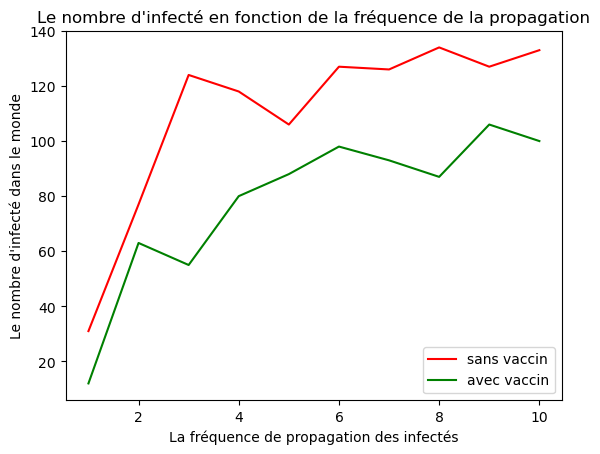

In [73]:
#variation du nombre infecté Mod1

def tour_boucle1(n,varinfet,nbtour,freq_deplap,duree_infection,m,chance_infect):
    liste = []
    i = 0
    for p in varinfet:
        i = 0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour:
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            worldbis,parabis = tour(worldbis,p,duree_infection,parabis,chance_infect)
            i+= 1
        liste.append(worldbis) 
    return liste



def tour_boucle_vaccin1(n,varinfet,nbtour,freq_depla,duree_infection,m,duree_vaccin,freq_vaccin,taux_immun,chance_infect,nb_vacc):
    liste = []
    i = 0
    for p in varinfet:
        i = 0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour :
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            if i%freq_vaccin == 0:
                for j in range (0,nb_vacc):
                    worldbis = vaccin(worldbis)
            worldbis,parabis = tour_vaccin(worldbis,p,duree_infection,parabis,duree_vaccin,taux_immun,chance_infect)
            i+= 1
        liste.append(worldbis)
    return liste


Lecture1 = lecture_infection(tour_boucle1(world,varinfect,nb_tour,freq_depla,duree_infection,parallele,chance_infect))
Lecture1_bis = lecture_infection(tour_boucle_vaccin1(world,varinfect,nb_tour,freq_depla,duree_infection,parallele,duree_vaccin,freq_vaccin,taux_immun,chance_infect,nb_vacc))


plt.figure()
plt.xlabel("La fréquence de propagation des infectés")
plt.ylabel("Le nombre d'infecté dans le monde")
plt.title("Le nombre d'infecté en fonction de la fréquence de la propagation")
plt.plot(varinfect,Lecture1,"r",label = "sans vaccin")
plt.plot(varinfect,Lecture1_bis,"g",label = "avec vaccin")
plt.legend()
plt.show()



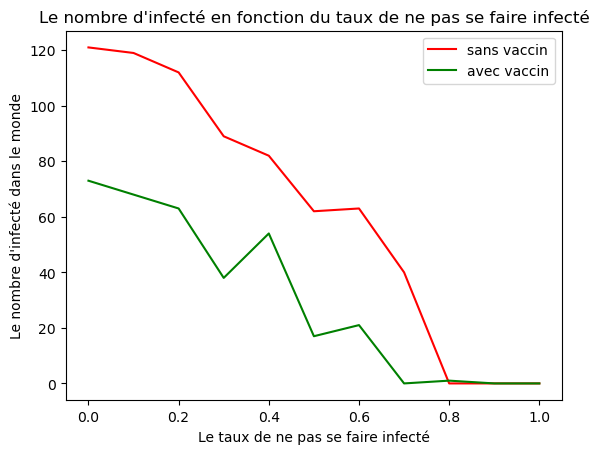

In [74]:
def tour_boucle2(world,infection,nbtour,freq_deplap,duree_infection,parallele,varchance_infect):
    liste = []
    i = 0
    for p in varchance_infect:
        i = 0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour:
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            worldbis,parabis = tour(worldbis,infection,duree_infection,parabis,p)
            i+= 1
        liste.append(worldbis) 
    return liste



def tour_boucle_vaccin2(world,infection,nbtour,freq_depla,duree_infection,parallele,duree_vaccin,freq_vaccin,taux_immun,varchance_infect,nb_vacc):
    liste = []
    i = 0
    for p in varchance_infect:
        i = 0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour :
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            if i%freq_vaccin == 0:
                for j in range (0,nb_vacc):
                    worldbis = vaccin(worldbis)
            worldbis,parabis = tour_vaccin(worldbis,infection,duree_infection,parabis,duree_vaccin,taux_immun,p)
            i+= 1
        liste.append(worldbis)
    return liste



Lecture2 = lecture_infection(tour_boucle2(world,infection,nb_tour,freq_depla,duree_infection,parallele,varchance_infect))
Lecture2_bis = lecture_infection(tour_boucle_vaccin2(world,infection,nb_tour,freq_depla,duree_infection,parallele,duree_vaccin,freq_vaccin,taux_immun,varchance_infect,nb_vacc))


plt.figure()
plt.xlabel("Le taux de ne pas se faire infecté")
plt.ylabel("Le nombre d'infecté dans le monde")
plt.title("Le nombre d'infecté en fonction du taux de ne pas se faire infecté")
plt.plot(varchance_infect,Lecture2,"r",label = "sans vaccin")
plt.plot(varchance_infect,Lecture2_bis,"g", label= "avec vaccin")
plt.legend()
plt.show()


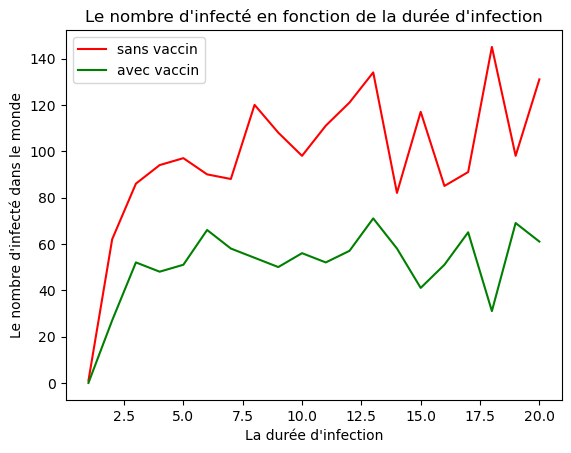

In [75]:
#vardur_infect = np.arange(1,21,1)

def tour_boucle3(world,infection,nbtour,freq_depla,vardur_infect,parallele,chance_infect):
    liste = []
    i = 0
    for p in vardur_infect:
        i=0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour:
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            worldbis,parabis = tour(worldbis,infection,p,parabis,chance_infect)
            i+= 1
        liste.append(worldbis) 
    return liste

def tour_boucle_vaccin3(world,infection,nbtour,freq_depla,vardur_infect,parallele,duree_vaccin,freq_vaccin,taux_immun,chance_infect,nb_vacc):
    liste = []
    i = 0
    for p in vardur_infect:
        i=0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour:
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            if i%freq_vaccin == 0:
                for j in range (0,nb_vacc):
                    worldbis = vaccin(worldbis)
            worldbis,parabis = tour_vaccin(worldbis,infection,p,parabis,duree_vaccin,taux_immun,chance_infect)
            i+= 1
        liste.append(worldbis) 
    return liste


Lecture3 = lecture_infection(tour_boucle3(world,infection,nb_tour,freq_depla,vardur_infect,parallele,chance_infect))
Lecture3_bis = lecture_infection(tour_boucle_vaccin3(world,infection,nb_tour,freq_depla,vardur_infect,parallele,duree_vaccin,freq_vaccin,taux_immun,chance_infect,nb_vacc))


plt.figure()
plt.xlabel("La durée d'infection")
plt.ylabel("Le nombre d'infecté dans le monde")
plt.title("Le nombre d'infecté en fonction de la durée d'infection")
plt.plot(vardur_infect,Lecture3,"r",label = "sans vaccin")
plt.plot(vardur_infect,Lecture3_bis,"g", label= "avec vaccin")
plt.legend()
plt.show()


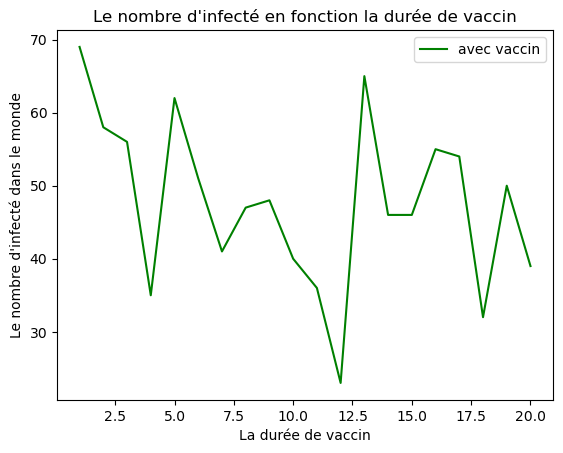

In [76]:
#en fonction nombre vaccin

def tour_boucle_vaccin4(world,infection,nbtour,freq_depla,duree_infection,parallele,vardur_vac,freq_vaccin,taux_immun,chance_infect,nb_vacc):
    liste = []
    i = 0
    for p in vardur_vac:
        i = 0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour :
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            if i%freq_vaccin == 0:
                for j in range (0,nb_vacc):
                    worldbis = vaccin(worldbis)
            worldbis,parabis = tour_vaccin(worldbis,infection,duree_infection,parabis,p,taux_immun,chance_infect)
            i+= 1
        liste.append(worldbis)
    return liste


Lecture4_bis = lecture_infection(tour_boucle_vaccin4(world,infection,nb_tour,freq_depla,duree_infection,parallele,vardur_vac,freq_vaccin,taux_immun,chance_infect,nb_vacc))


plt.figure()
plt.xlabel("La durée de vaccin")
plt.ylabel("Le nombre d'infecté dans le monde")
plt.title("Le nombre d'infecté en fonction la durée de vaccin")
plt.plot(vardur_vac,Lecture4_bis,"g", label= "avec vaccin")
plt.legend()
plt.show()


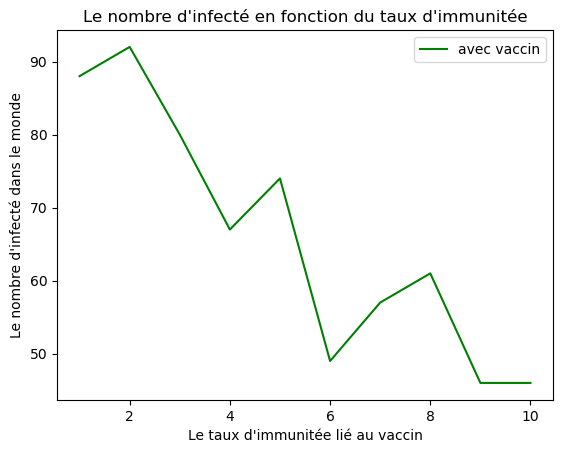

In [80]:
#vartaux_immun = np.arange(0.1,1.1,0.1)
def tour_boucle_vaccin5(world,infection,nbtour,freq_depla,duree_infection,parallele,duree_vaccin,freq_vaccin,vartaux_immun,chance_infect,nb_vacc):
    liste = []
    i = 0
    for p in vartaux_immun:
        i=0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour:
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            if i%freq_vaccin == 0:
                for j in range (0,nb_vacc):
                    worldbis = vaccin(worldbis)
            worldbis,parabis = tour_vaccin(worldbis,infection,duree_infection,parabis,duree_vaccin,p,chance_infect)
            i+= 1
        liste.append(worldbis) 
    return liste


Lecture5_bis = lecture_infection(tour_boucle_vaccin5(world,infection,nb_tour,freq_depla,duree_infection,parallele,duree_vaccin,freq_vaccin,vartaux_immun,chance_infect,nb_vacc))


plt.figure()
plt.xlabel("Le taux d'immunitée lié au vaccin")
plt.ylabel("Le nombre d'infecté dans le monde")
plt.title("Le nombre d'infecté en fonction du taux d'immunitée")
plt.plot(varinfect,Lecture5_bis,'g', label= "avec vaccin")
plt.legend()
plt.show()


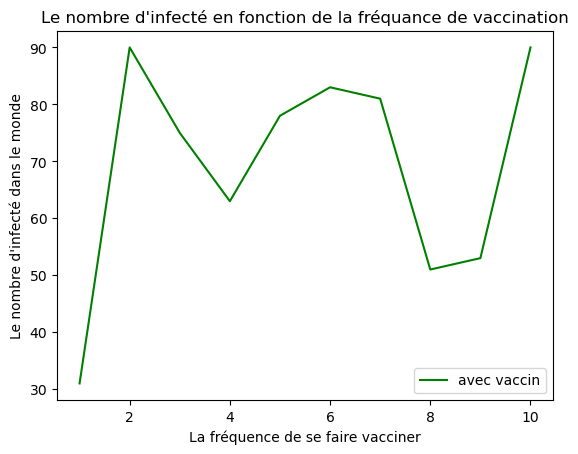

In [78]:
#en fonction du nombre de vaccin

def tour_boucle_vaccin6(world,infection,nbtour,freq_depla,duree_infection,parallele,duree_vaccin,varfreq_vac,taux_immun,chance_infect,nb_vacc):
    liste = []
    i = 0
    for p in varfreq_vac:
        i = 0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour :
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            if i%p == 0:
                for j in range (0,nb_vacc):
                    worldbis = vaccin(worldbis)
            worldbis,parabis = tour_vaccin(worldbis,infection,duree_infection,parabis,duree_vaccin,taux_immun,chance_infect)
            i+= 1
        liste.append(worldbis)
    return liste



Lecture6_bis = lecture_infection(tour_boucle_vaccin6(world,infection,nb_tour,freq_depla,duree_infection,parallele,duree_vaccin,varfreq_vac,taux_immun,chance_infect,nb_vacc))


plt.figure()
plt.xlabel("La fréquence de se faire vacciner")
plt.ylabel("Le nombre d'infecté dans le monde")
plt.title("Le nombre d'infecté en fonction de la fréquance de vaccination")
plt.plot(varfreq_vac,Lecture6_bis, "g" ,label= "avec vaccin")
plt.legend()
plt.show()


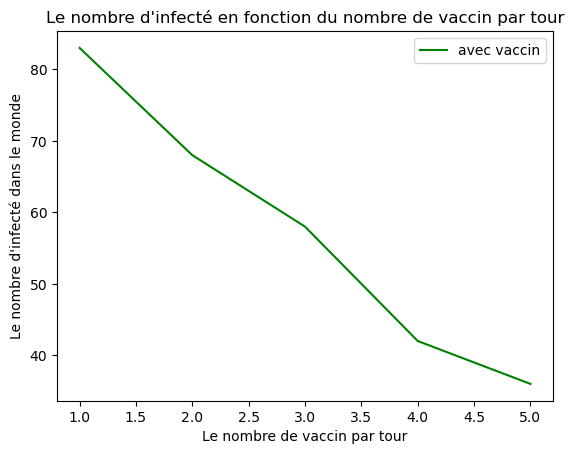

In [81]:
#varnb_var = np.arange(1,6,1)

def tour_boucle_vaccin7(world,infection,nbtour,freq_depla,duree_infection,parallele,duree_vaccin,freq_vaccin,taux_immun,chance_infect,varnb_var):
    liste = []
    i = 0
    for p in varnb_var :
        i=0
        worldbis = np.copy(world)
        parabis = np.copy(parallele)
        while i < nbtour:
            if i%freq_depla == 0:
                worldbis,parabis = deplacement(worldbis,parabis)
            if i%freq_vaccin == 0:
                for j in range (0,p):
                    worldbis = vaccin(worldbis)
            worldbis,parabis = tour_vaccin(worldbis,infection,duree_infection,parabis,duree_vaccin,taux_immun,chance_infect)
            i+= 1
        liste.append(worldbis) 
    return liste


Lecture7_bis = lecture_infection(tour_boucle_vaccin7(world,infection,nb_tour,freq_depla,duree_infection,parallele,duree_vaccin,freq_vaccin,taux_immun,chance_infect,varnb_var))


plt.figure()
plt.xlabel("Le nombre de vaccin par tour")
plt.ylabel("Le nombre d'infecté dans le monde")
plt.title("Le nombre d'infecté en fonction du nombre de vaccin par tour")
plt.plot(varnb_var,Lecture7_bis,'g', label = "avec vaccin")
plt.legend()
plt.show()
